<h1>0. データ表示</h1>

In [1]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

In [2]:
# titanic data csvファイルの読み込み
titanic_df = pd.read_csv('titanic_train.csv')

In [3]:
print(titanic_df.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
# ファイルの先頭部を表示し、データセットを確認する
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<h1>1. データの分析</h1>

In [5]:
#統計量をみる
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#相関係数をみる
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<h1>1. データの分析</h1>
<h3>不要なデータの削除・欠損値の補完</h3>

In [7]:
#欠損値を補完 (Ageの欠損値を補完して書き込み)
titanic_df["Age"].fillna(titanic_df.Age.mean(), inplace=True)

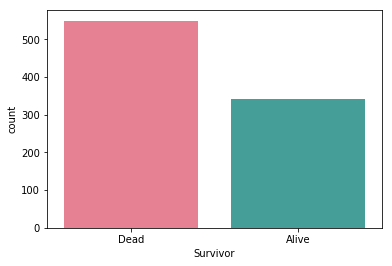

In [8]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'Dead', 1:'Alive'})
sns.countplot('Survivor', data=titanic_df, palette='husl')

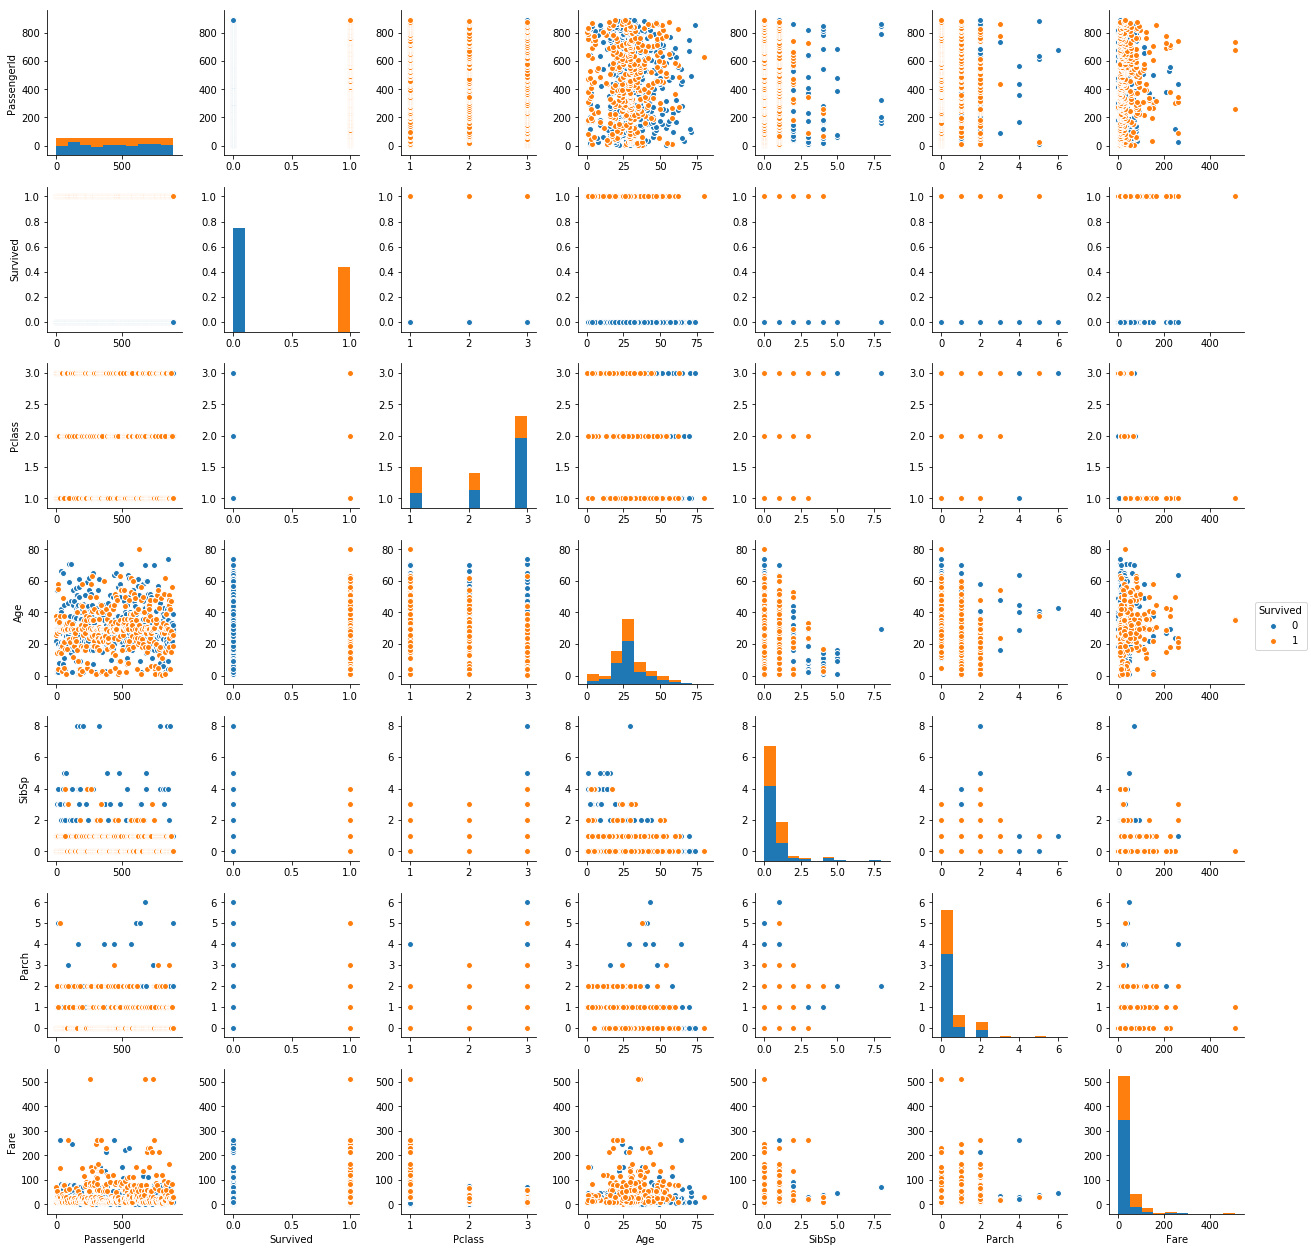

In [9]:
#欠損値を補完 (生存・死者情報で色分け)
sns.pairplot(data=titanic_df, hue="Survived")

<h1>1. データの分析</h1>
<h3>年齢について</h3>

In [10]:
#年齢の最大値を算出
max_age = titanic_df['Age'].max()
print('年齢の最大値: {0}'.format(max_age))

#年齢の平均値を算出
mean_age = titanic_df['Age'].mean()
print('年齢の平均値: {0}'.format(mean_age))

年齢の最大値: 80.0
年齢の平均値: 29.699117647058763


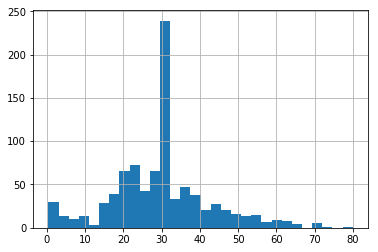

In [11]:
titanic_df['Age'].hist(bins=30)

In [12]:
#年齢の高い上位10名を確認してみましょう。

titanic_df[['Name', 'Sex', 'Age']].sort_values(by='Age', ascending=False).head(10)

,Name,Sex,Age
630,"Barkworth, Mr. Algernon Henry Wilson",male,80.0
851,"Svensson, Mr. Johan",male,74.0
96,"Goldschmidt, Mr. George B",male,71.0
493,"Artagaveytia, Mr. Ramon",male,71.0
116,"Connors, Mr. Patrick",male,70.5
672,"Mitchell, Mr. Henry Michael",male,70.0
745,"Crosby, Capt. Edward Gifford",male,70.0
33,"Wheadon, Mr. Edward H",male,66.0
456,"Millet, Mr. Francis Davis",male,65.0
54,"Ostby, Mr. Engelhart Cornelius",male,65.0


In [13]:
#上位10名は全員男性のようですね。女性に限定してデータを見てみましょう。
titanic_df[titanic_df.Sex=='female'][['Name', 'Sex', 'Age']].sort_values(by='Age', ascending=False).head(10)

,Name,Sex,Age
483,"Turkula, Mrs. (Hedwig)",female,63.0
275,"Andrews, Miss. Kornelia Theodosia",female,63.0
829,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0
195,"Lurette, Miss. Elise",female,58.0
268,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0
11,"Bonnell, Miss. Elizabeth",female,58.0
772,"Mack, Mrs. (Mary)",female,57.0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0
15,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0


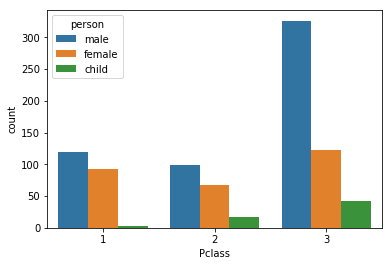

In [14]:
# データには年齢の欄はあるが子供かどうかの欄はない
# ここでは10歳未満を子供とする

def male_female_child(passenger):
    age, sex = passenger
    if age < 10:
        return 'child'
    else:
        return sex

# 男女と子供にわけたpersonという新しい列を追加
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

# 乗客数（生存者含む）をカウントする
sns.countplot('Pclass', data=titanic_df, hue='person')

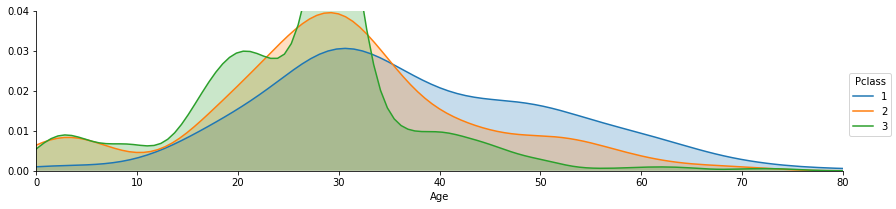

In [15]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest), ylim=(0,0.04))
fig.add_legend()

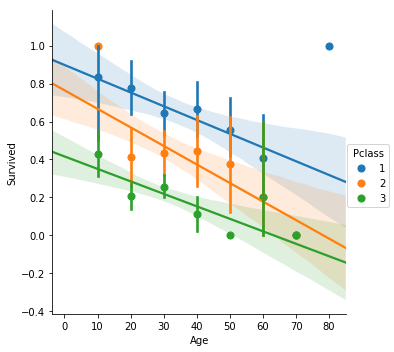

In [16]:
generations = [10,20,30,40,50,60,70,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df,
           hue_order=[1,2,3], x_bins=generations)

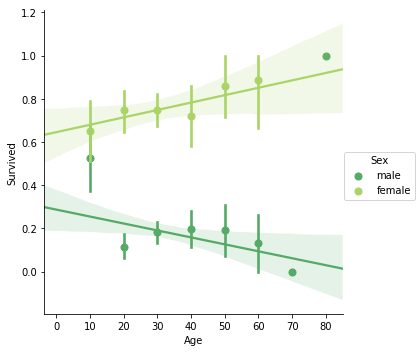

In [17]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='summer',
           x_bins=generations)

<h1>1. データの分析</h1>
<h3>運賃について</h3>

In [18]:
titanic_df['Fare'].max()

512.32920000000001

In [19]:
titanic_df['Fare'].mean()

32.2042079685746

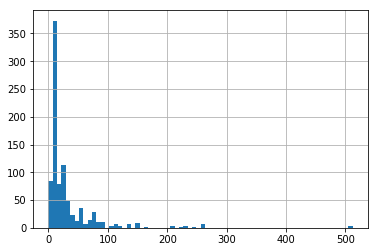

In [20]:
titanic_df['Fare'].hist(bins=70)

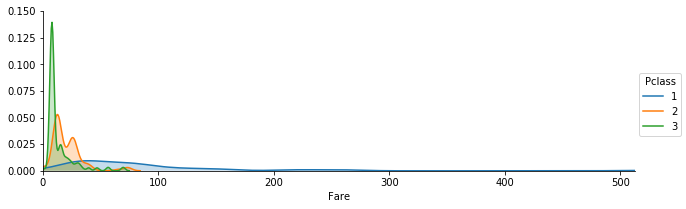

In [21]:
# FacetGridを使って客室クラス別の乗船費用の分布をみる
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=3)
fig.map(sns.kdeplot, 'Fare', shade=True)
highest = titanic_df['Fare'].max()
fig.set(xlim=(0, highest), ylim=(0,0.15))
fig.add_legend()

In [22]:
titanic_df[titanic_df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,person
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Alive,female
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Alive,male
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Alive,male


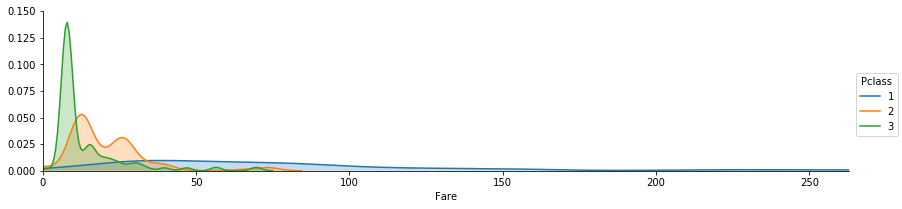

In [23]:
drop_idx = [258, 679, 737]
titanic_df2 = titanic_df.drop(drop_idx)

fig = sns.FacetGrid(titanic_df2, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Fare', shade=True)
highest = titanic_df2['Fare'].max()
fig.set(xlim=(0,highest), ylim=(0,0.15))
fig.add_legend()

In [24]:
<h1>1. データの分析</h1>
<h3>乗船した港について</h3>

SyntaxError: invalid syntax (<ipython-input-24-93f1a4f815df>, line 1)

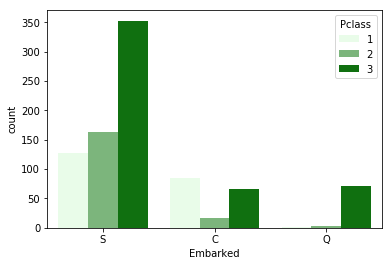

In [25]:
sns.countplot('Embarked', data=titanic_df, hue='Pclass', color ='g')

In [26]:
<h1>1. データの分析</h1>
<h3>社会階級について</h3>

SyntaxError: invalid syntax (<ipython-input-26-07e98f3262a1>, line 1)

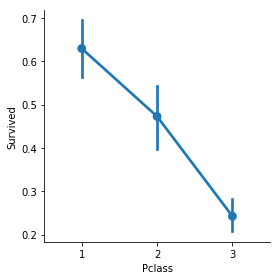

In [27]:
sns.factorplot('Pclass', 'Survived', data=titanic_df)

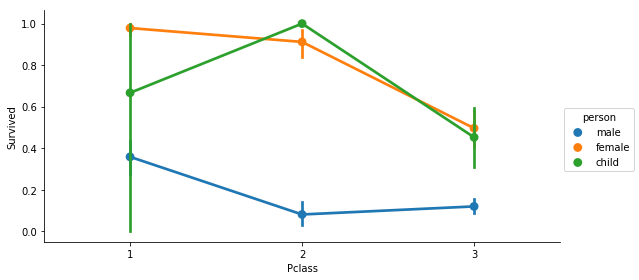

In [28]:
sns.factorplot('Pclass', 'Survived', data=titanic_df, aspect=2, hue='person')